In [ ]:
#Regression 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import make_regression

In [67]:
X,Y = make_regression(n_samples=200,n_features=1,noise=50.5,n_informative=1,random_state=1)

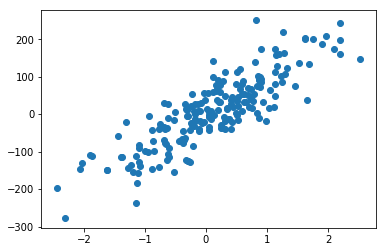

In [68]:
plt.scatter(X,Y)

In [21]:
print(X.shape, Y.shape)

(200, 1) (200,)


In [16]:
def hypothesis(x,theta):
    return theta[0]+x*theta[1]

In [17]:
def predictions(X, theta):
    y_pred = []
    
    for i in range(X.shape[0]):
        pred = hypothesis(X[i], theta)
        y_pred.append(pred)
    
    y_pred = np.array(y_pred)
    return y_pred

In [18]:
def get_error(X,Y,theta):
    e = 0
    m = X.shape[0]
    for i in range(m):
        e += (hypothesis(X[i],theta)-Y[i])**2
    return e


In [27]:
def getgradients(X,Y,theta):
    
    grads = np.zeros((2))
    m = X.shape[0]
    
    for i in range(m):
        XPi = hypothesis(X[i], theta)
        grads[0] += (XPi-Y[i])
        grads[1] += (XPi-Y[i])*X[i]
        
    return grads

In [71]:
#Algo King 
def gradientDescent(X,Y,maxitr=100,learning_rate=0.001):
    
    theta = np.zeros((2))
    error_list = []
    
    for i in range(maxitr):
        grad = getgradients(X,Y,theta)
        e = get_error(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]  
        theta[1] = theta[1] - learning_rate*grad[1]
        
        if(i%10==0):
            plt.figure(1)
            plt.scatter(X,Y)
            plt.plot(X,predictions(X,theta),c='red')
            plt.pause(2)
            
        error_list.append(e)
        
    return theta,error_list    
    

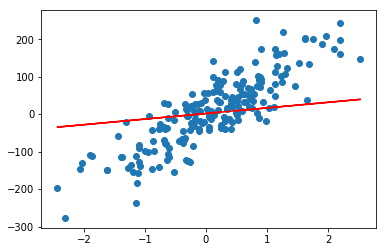

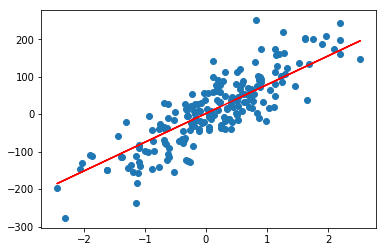

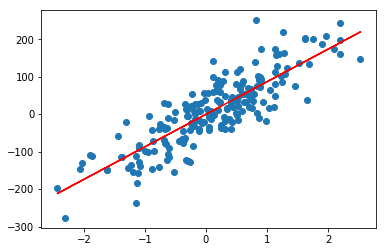

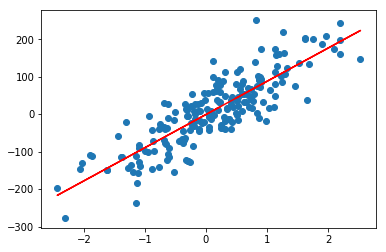

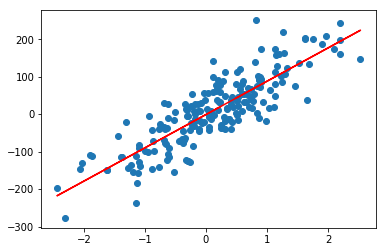

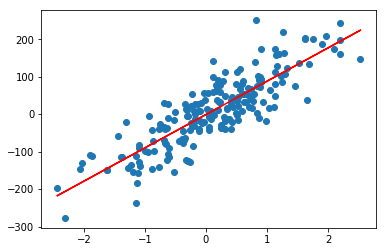

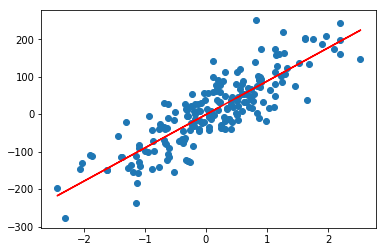

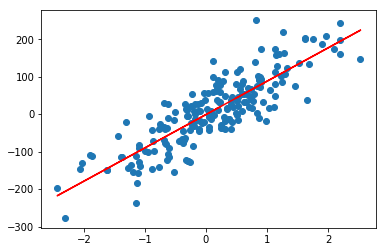

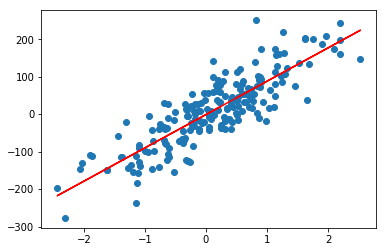

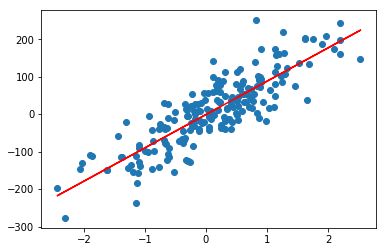

In [72]:
final_theta, error_list = gradientDescent(X,Y)

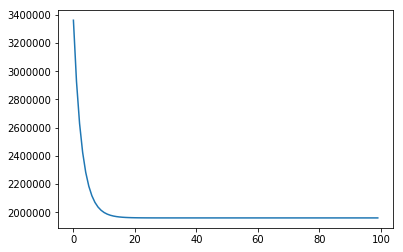

In [49]:
plt.plot(error_list)
plt.show()

In [50]:
print(final_theta)

[-2.09533629 91.61131878]


In [51]:
##Regression challenge

In [52]:
xdata = pd.read_csv('Linear_X_Train.csv')
ydata = pd.read_csv('Linear_Y_Train.csv')

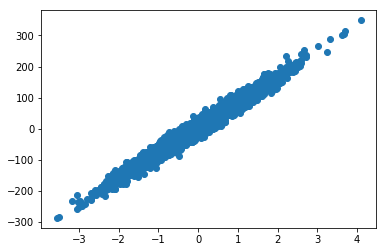

In [57]:
plt.scatter(xdata,ydata)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
xtdata = pd.read_csv('Linear_X_Test.csv')

In [63]:
y_pred = lr.predict(xtdata)

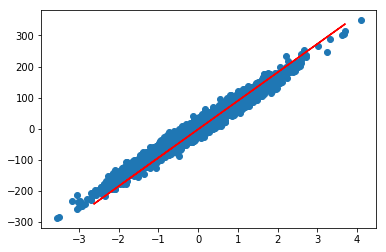

In [65]:
plt.scatter(xdata,ydata)
plt.plot(xtdata,y_pred, c = 'red')
plt.show()

In [66]:
lr.score(X,Y)

0.41497283867543955